In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew

In [191]:
#Cargamos el archivo desde train_m
train = pd.read_excel("E-Commerce_train.xlsx")

In [193]:
#Dropeamos primera columnas Id, llamada "Unnamed:0"
train = train.drop(["ID"], axis=1)


In [194]:
#Renonbramos las columnas en español
columns_spanish = ["Bloque_de_Almacen","Modo_de_Envio","Llamadas_de_atecion_cliente","Valoracion_de_clientes","Coste_del_producto","Compras_Anteriores","Importancia_del_producto","Genero","Descuento","Peso_en_gramos","A_Tiempo"]
train.columns = columns_spanish
train.head(3)

,Bloque_de_Almacen,Modo_de_Envio,Llamadas_de_atecion_cliente,Valoracion_de_clientes,Coste_del_producto,Compras_Anteriores,Importancia_del_producto,Genero,Descuento,Peso_en_gramos,A_Tiempo
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1


### Veamos cuantos datos faltantes existen (Missing Data)

In [99]:
#¿Qué porcentaje de valores faltantes tenemos?
Missing_data = train.isnull().sum()
Data_total = np.product(train.shape)
Missing_total = Missing_data.sum()
Porcentaje = (Missing_total/Data_total)*100
print("El porcentaje de los datos faltantes es: {}% ".format(Porcentaje))


El porcentaje de los datos faltantes es: 0.0% 


### Distribución de variables

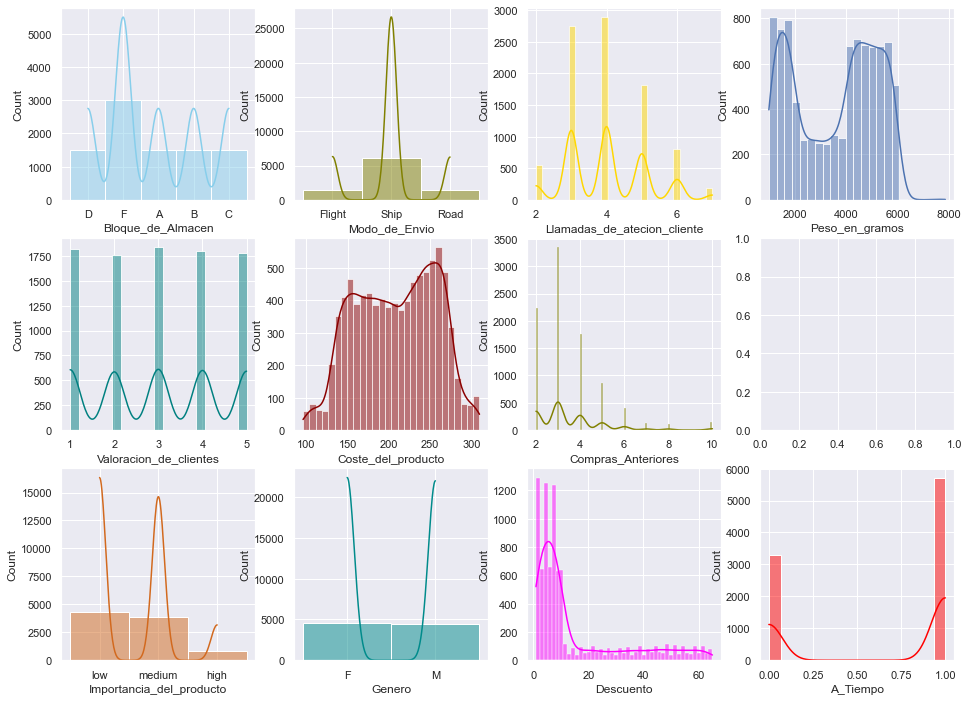

In [88]:
#Distribución de columnas

#Se define el estilo a mostar:
sns.set(style="darkgrid")

#Se define el tamaño de la imagen
fig, axs = plt.subplots(3, 4, figsize=(16, 12))

#Se hace una grafica de distribución de cada columna del dataset.
#Y se ubica en un determinado lugar dentro de la figura generada en el paso anterior:

#Datos de entrada:
sns.histplot(train["Bloque_de_Almacen"], kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(train["Modo_de_Envio"], kde=True, color="olive", ax=axs[0, 1])
sns.histplot(train["Llamadas_de_atecion_cliente"], kde=True, color="gold", ax=axs[0, 2])
sns.histplot(train["Valoracion_de_clientes"], kde=True, color="teal", ax=axs[1, 0])
sns.histplot(train["Coste_del_producto"], kde=True, color="darkred", ax=axs[1, 1])
sns.histplot(train["Compras_Anteriores"], kde=True, color="olive", ax=axs[1, 2])
sns.histplot(train["Importancia_del_producto"], kde=True, color="chocolate", ax=axs[2, 0])
sns.histplot(train["Genero"], kde=True, color="darkcyan", ax=axs[2, 1])
sns.histplot(train["Descuento"], kde=True, color="fuchsia", ax=axs[2, 2])
sns.histplot(train["Peso_en_gramos"], kde=True, color="b", ax=axs[0, 3])

#Dato de salida/Variable que se quiere predecir
sns.histplot(train["A_Tiempo"], kde=True, color="red", ax=axs[2, 3])

plt.show()

### Correlaciones

<AxesSubplot:>

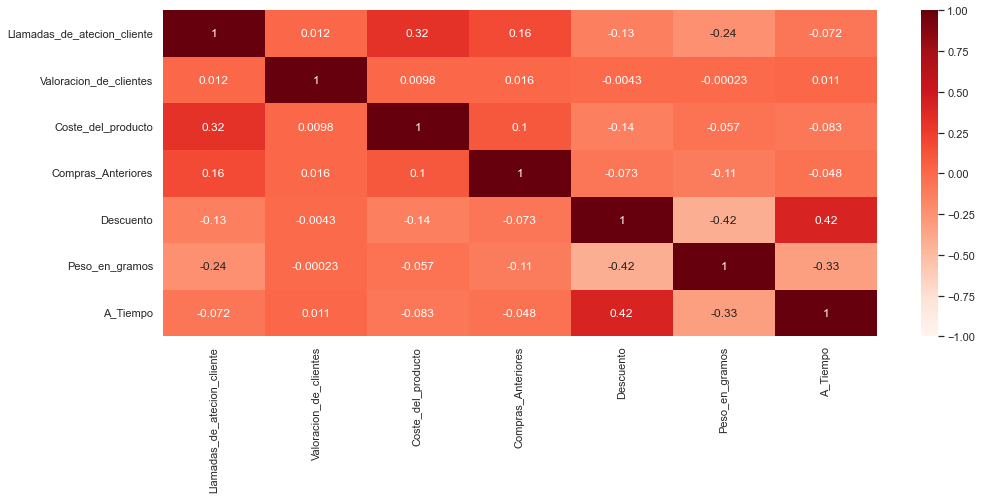

In [89]:
#Gráfia de Correlaciones:
plt.figure(figsize=(16, 6))
sns.heatmap(train.corr(), vmin=-1, vmax=1, annot=True, cmap="Reds")

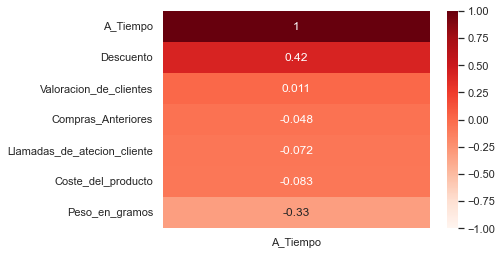

In [90]:
#Se compara la variable de salida con las otras variable respecto a su correlación
#Se ordena de mayor a menor.
heatmap = sns.heatmap(train.corr()[["A_Tiempo"]].sort_values(by="A_Tiempo", ascending=False), vmin=-1, vmax=1, annot=True, cmap="Reds")

### Gráficos de disperción de cada variable con respecto a la salida (A_Tiempo)

<AxesSubplot:xlabel='A_Tiempo', ylabel='A_Tiempo'>

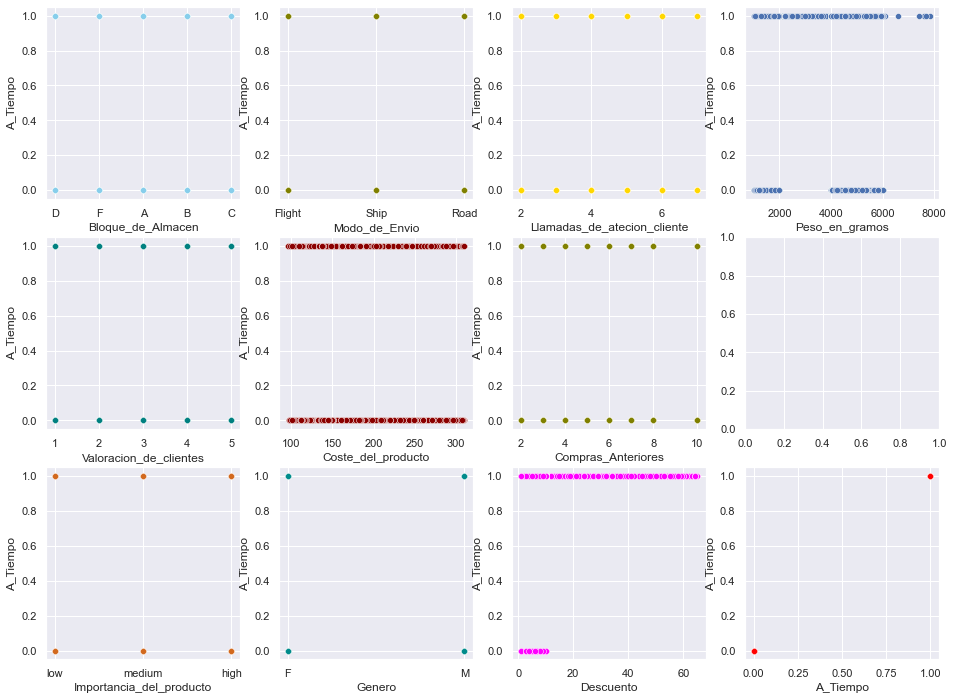

In [133]:

sns.set(style="darkgrid")
fig, axs = plt.subplots(3, 4, figsize=(16, 12))
sns.scatterplot(x = train["Bloque_de_Almacen"], y = train["A_Tiempo"], color="skyblue", ax=axs[0, 0])
sns.scatterplot(x = train["Modo_de_Envio"], y = train["A_Tiempo"], color="olive", ax=axs[0, 1])
sns.scatterplot(x = train["Llamadas_de_atecion_cliente"], y = train["A_Tiempo"], color="gold", ax=axs[0, 2])
sns.scatterplot(x = train["Valoracion_de_clientes"], y = train["A_Tiempo"], color="teal", ax=axs[1, 0])
sns.scatterplot(x = train["Coste_del_producto"], y = train["A_Tiempo"], color="darkred", ax=axs[1, 1])
sns.scatterplot(x = train["Compras_Anteriores"], y = train["A_Tiempo"], color="olive", ax=axs[1, 2])
sns.scatterplot(x = train["Importancia_del_producto"], y = train["A_Tiempo"], color="chocolate", ax=axs[2, 0])
sns.scatterplot(x = train["Genero"], y = train["A_Tiempo"], color="darkcyan", ax=axs[2, 1])
sns.scatterplot(x = train["Descuento"], y = train["A_Tiempo"], color="fuchsia", ax=axs[2, 2])
sns.scatterplot(x = train["Peso_en_gramos"], y = train["A_Tiempo"], color="b", ax=axs[0, 3])
sns.scatterplot(x = train["A_Tiempo"], y = train["A_Tiempo"], color="red", ax=axs[2, 3])



### Analizando la variable de salida [A_Tiempo] 


 mu = 0.64 y sigma = 0.48



c:\Users\CRISTHIAN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'A_tiempo distribución')

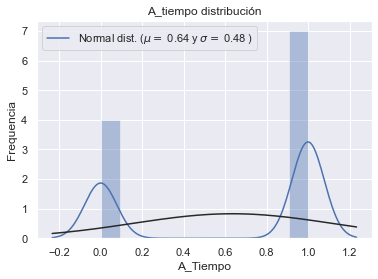

In [143]:
sns.distplot(train['A_Tiempo'] , fit=norm)

# Definimos media (mu) y desviación estandar (sigma)
(mu, sigma) = norm.fit(train["A_Tiempo"])
print( '\n mu = {:.2f} y sigma = {:.2f}\n'.format(mu, sigma))

#Graficamos:
plt.legend(['Normal dist. ($\mu=$ {:.2f} y $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequencia')
plt.title('A_tiempo distribución')

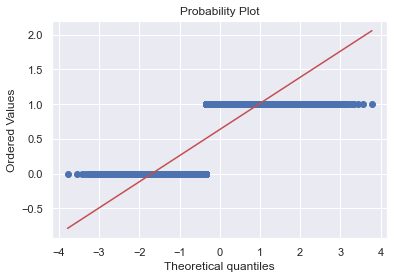

In [148]:
fig = plt.figure()
res = stats.probplot(train['A_Tiempo'], plot=plt)
plt.show()

In [195]:

#Normalizacion de datos:

train["Llamadas_de_atecion_cliente"] =  (train["Llamadas_de_atecion_cliente"]-train["Llamadas_de_atecion_cliente"].mean()) / (train["Llamadas_de_atecion_cliente"].std())
train["Valoracion_de_clientes"] =  (train["Valoracion_de_clientes"]-train["Valoracion_de_clientes"].mean()) / (train["Valoracion_de_clientes"].std())
train["Coste_del_producto"] =  (train["Coste_del_producto"]-train["Coste_del_producto"].mean()) / (train["Coste_del_producto"].std())
train["Compras_Anteriores"] =  (train["Compras_Anteriores"]-train["Compras_Anteriores"].mean()) / (train["Compras_Anteriores"].std())
train["Descuento"] =  (train["Descuento"]-train["Descuento"].mean()) / (train["Descuento"].std())
train["Peso_en_gramos"] =  (train["Peso_en_gramos"]-train["Peso_en_gramos"].mean()) / (train["Peso_en_gramos"].std())


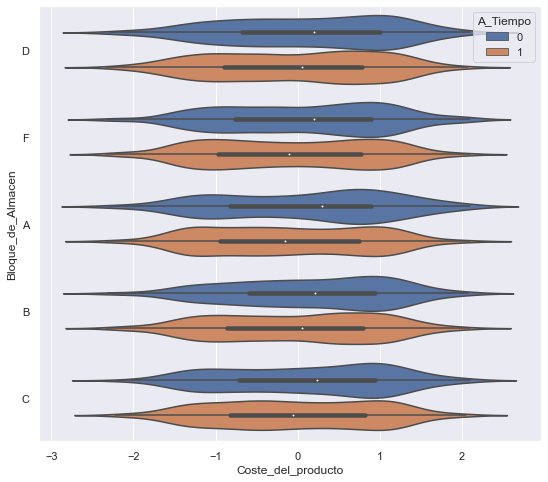

In [206]:
# first ten features
plt.figure(figsize=(9,8))
sns.violinplot(data = train, x = "Coste_del_producto", y = "Bloque_de_Almacen", hue = "A_Tiempo")
plt.show()

c:\Users\CRISTHIAN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\CRISTHIAN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 74.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


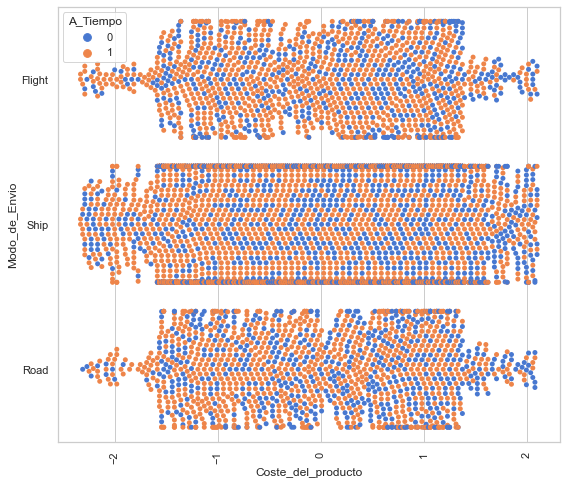

In [210]:
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(9,8))
sns.swarmplot(data = train, x = "Coste_del_producto", y = "Modo_de_Envio", hue = "A_Tiempo")
plt.xticks(rotation=90)
plt.show()